In [1]:
# package for querying SAR Imagery
import asf_search as asf


import json
import requests
from PIL import Image
from io import BytesIO
from ipyleaflet import Map, Polygon
from ipywidgets import HTML, Button, VBox, Output
from IPython.display import display, clear_output
from shapely.geometry import Polygon as ShapelyPolygon

## **SAR Imagery Scrape**
#### [Scrape Using This](https://github.com/asfadmin/Discovery-asf_search/tree/master)

---

#### Create the polygon to query intersecting images

In [8]:
# Initialize the map
m = Map(center=(20, 0), zoom=2)

# Initialize an empty list for points and the polygon layer
points = []
polygon = Polygon(locations=[], color="green", fill_color="green")
m.add_layer(polygon)

# Function to handle map clicks
def handle_click(**kwargs):
    if kwargs.get('type') == 'click':
        # Get coordinates from the click event
        coords = kwargs.get('coordinates')
        # Append the new point
        points.append(coords)
        
        # Assign a new list to the polygon's locations (this might force the update)
        polygon.locations = list(points)

# Set up the map to listen for clicks
m.on_interaction(handle_click)

# Create a button for generating the WKT representation of the polygon
create_button = Button(description="Create Polygon")

# Function to generate and print the WKT
def create_polygon(b):
    if len(points) > 2:  # Ensure there are at least 3 points
        shapely_polygon = ShapelyPolygon(points)
        print(shapely_polygon.wkt)  # Print the polygon's WKT
    else:
        print("Add more points to create a polygon.")

# Set the button to run `create_polygon` function on click
create_button.on_click(create_polygon)

# Display the map and button
display(m)
display(create_button)


Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

Button(description='Create Polygon', style=ButtonStyle())

POLYGON ((82.33238201413792 -92.06542968750001, 83.53996971923033 -71.36718750000001, 82.36748261438585 -58.40332031250001, 80.69689527569578 -88.857421875, 82.33238201413792 -92.06542968750001))


In [11]:
aoi = ShapelyPolygon(points).wkt # polygon from previous cell

opts = {
    'platform': asf.PLATFORM.SENTINEL1,
    'start': '2015-01-01T00:00:00Z', # start date
    'end': '2018-02-01T23:59:59Z' # end date
}

results = asf.geo_search(intersectsWith=aoi, **opts)

print(f'{len(results)} results found')

9296 results found


In [12]:
# extract urls
urls = []
for i in range(len(results)):
    to_json = json.loads(str(results[i]))
    url = to_json['properties']['browse']
    if url: urls.append(url[0])

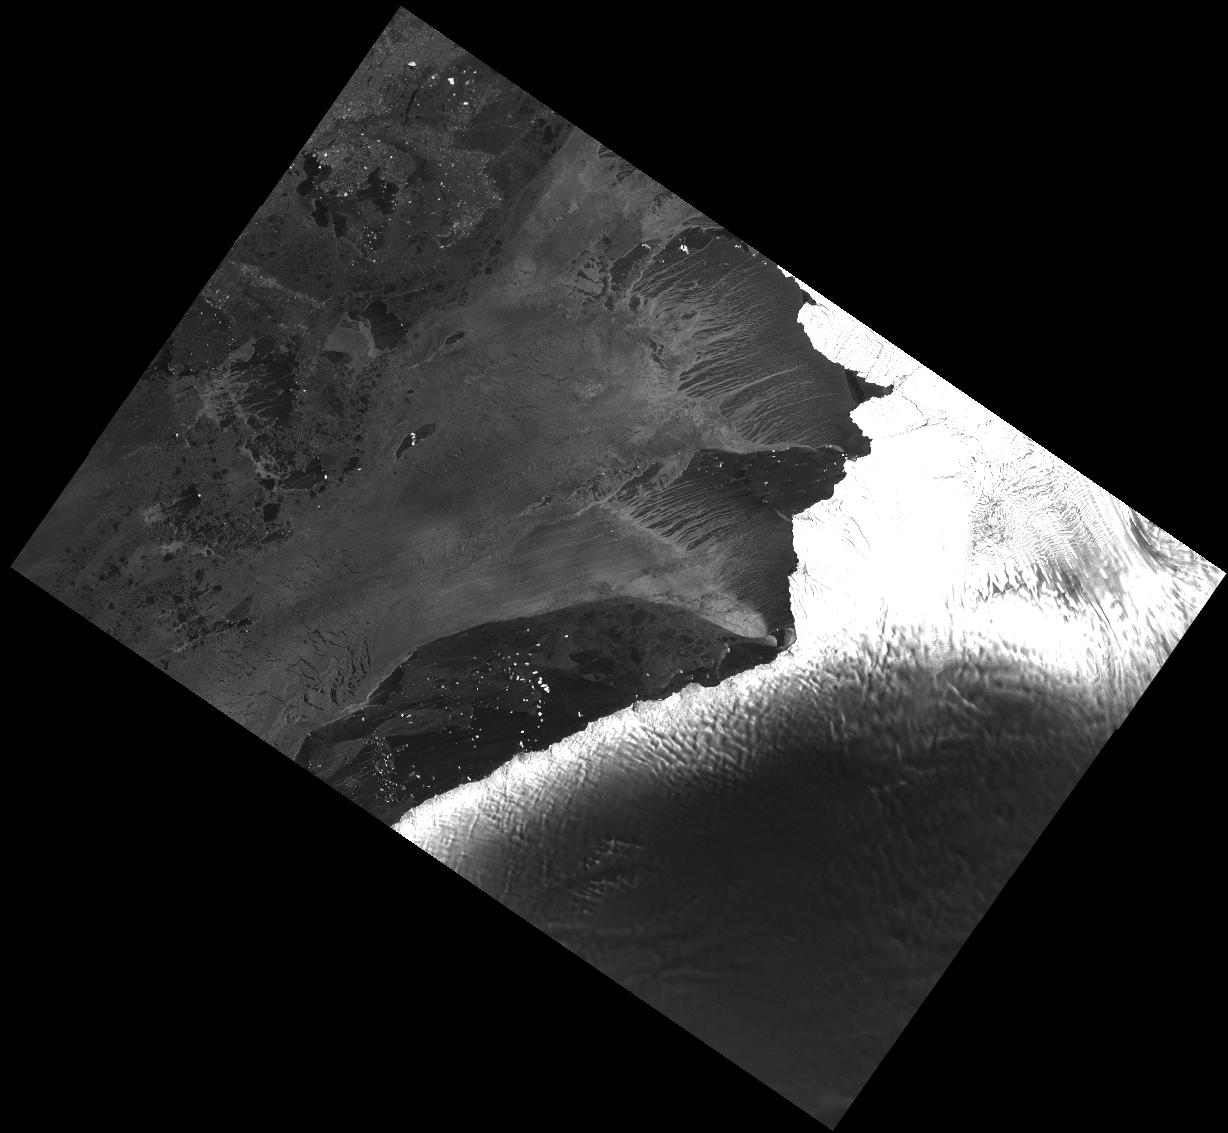

In [15]:
# get images
response = requests.get(urls[1200])
if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    display(image)
else:
    print("Failed to fetch the image. Status code:", response.status_code)